In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("credit dataa.csv")

In [ ]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
df.tail(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
990,37,male,1,own,NaN,NaN,3565,12,education,good
991,34,male,1,own,moderate,NaN,1569,15,radio/TV,good
992,23,male,1,rent,NaN,little,1936,18,radio/TV,good
993,30,male,3,own,little,little,3959,36,furniture/equipment,good
994,50,male,2,own,NaN,NaN,2390,12,car,good
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad
999,27,male,2,own,moderate,moderate,4576,45,car,good


In [ ]:
df.shape

(1000, 10)

In [ ]:
df.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

Dealing with Null values of Saving accounts

In [ ]:
df['Saving accounts'].unique()

array([nan, 'little', 'quite rich', 'rich', 'moderate'], dtype=object)

In [ ]:
df['Saving accounts'].mode()

0    little
Name: Saving accounts, dtype: object

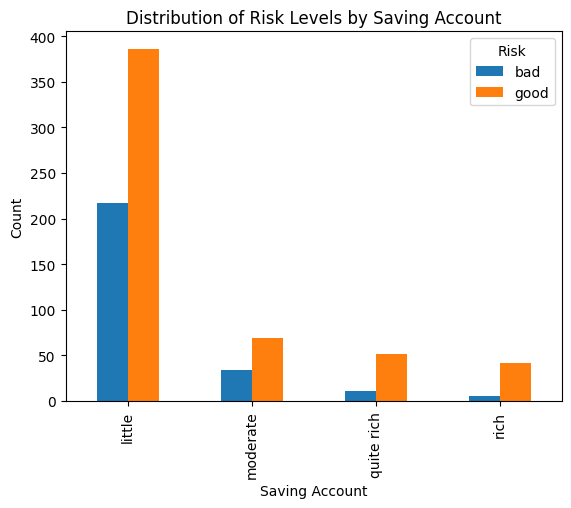

In [ ]:
grouped  = df.groupby(['Saving accounts', 'Risk']).size().unstack()
grouped.plot(kind='bar',stacked=False)

# Set the labels and title
plt.xlabel('Saving Account')
plt.ylabel('Count')
plt.title('Distribution of Risk Levels by Saving Account')

# Display the chart
plt.show()

In [ ]:
df['Saving accounts'].fillna(df['Saving accounts'].mode()[0],inplace = True)

In [ ]:
df['Saving accounts'].isna().sum()

0

Dealing with null values of Checking accounts

In [ ]:
df['Checking account'].unique()

array(['little', 'moderate', nan, 'rich'], dtype=object)

In [ ]:
df['Checking account'].mode()

0    little
Name: Checking account, dtype: object

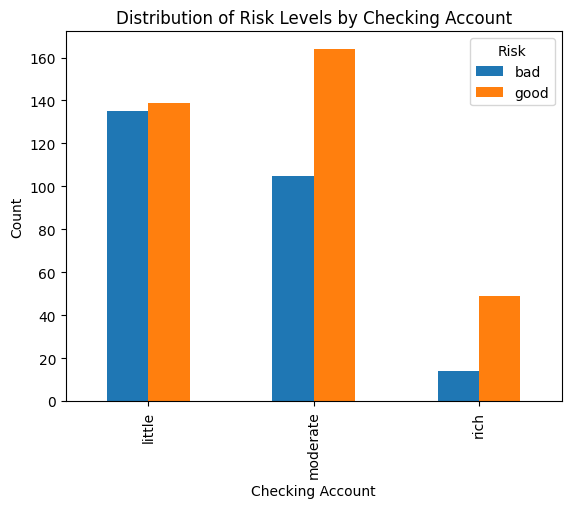

In [ ]:
# Group the dataframe by 'checking account' and 'risk', and count the occurrences
grouped = df.groupby(['Checking account', 'Risk']).size().unstack()

# Plot the bar chart
grouped.plot(kind='bar', stacked=False)

# Set the labels and title
plt.xlabel('Checking Account')
plt.ylabel('Count')
plt.title('Distribution of Risk Levels by Checking Account')

# Display the chart
plt.show()

In [ ]:
df['Checking account'].fillna(df['Checking account'].mode()[0],inplace = True)

In [ ]:
df['Checking account'].isna().sum()

0

In [ ]:
df.isna().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

Removed all the null values

In [ ]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,little,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,little,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


Map male and female values to 0 and 1

In [ ]:
df['Sex'] = df['Sex'].map({'male':0, 'female':1})

In [ ]:
df['Housing'].unique()

array(['own', 'free', 'rent'], dtype=object)

In [ ]:
# df['Housing']=df['Housing'].map({'rent':1,'free':2,'own':3})

In [ ]:
mapping = {
    'own': 3, 'rent': 2, 'free': 1,
    'little': 1, 'moderate': 2, 'quite rich': 3, 'rich': 4
}

In [ ]:
df['Housing'] = df['Housing'].map(mapping)
df['Saving accounts'] = df['Saving accounts'].map(mapping)
df['Checking account'] = df['Checking account'].map(mapping)

In [ ]:
df['Risk'] = df['Risk'].map({'good':1,'bad':0})

In [ ]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,0,2,3,1,1,1169,6,radio/TV,1
1,22,1,2,3,1,2,5951,48,radio/TV,0
2,49,0,1,3,1,1,2096,12,education,1
3,45,0,2,1,1,1,7882,42,furniture/equipment,1
4,53,0,2,1,1,1,4870,24,car,0


In [ ]:
min(df['Age']),max(df['Age'])

(19, 75)

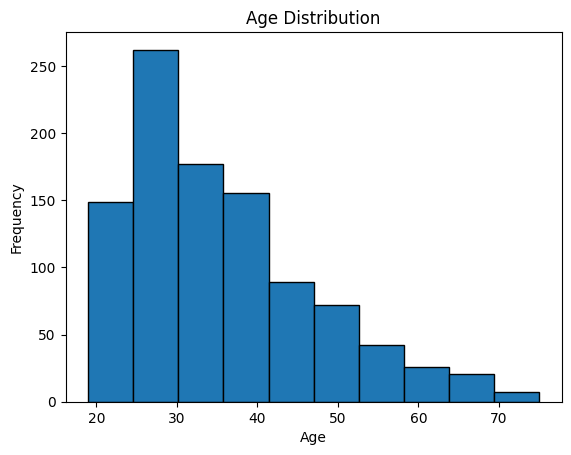

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a pandas DataFrame called 'data' with a column named 'age'
plt.hist(df['Age'], bins=10, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()


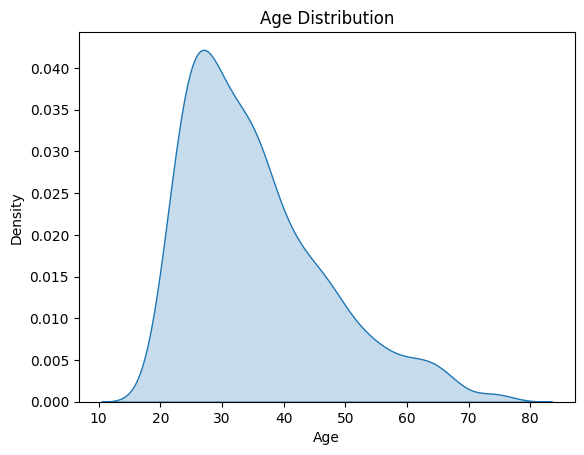

In [ ]:
import seaborn as sns

# Assuming you have a pandas DataFrame called 'data' with a column named 'age'
sns.kdeplot(df['Age'], fill=True)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution')
plt.show()


In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Apply one-hot encoding to 'sex', 'housing', and 'purpose' columns
one_hot_cols = ['Purpose']
one_hot_encoded = pd.get_dummies(df[one_hot_cols], drop_first=True)

# Apply label encoding to 'Saving accounts' and 'Checking account' columns
# label_cols = ['Saving accounts', 'Checking account']
# label_encoder = LabelEncoder()
# for col in label_cols:
#     df[col] = label_encoder.fit_transform(df[col])

# Concatenate the encoded columns with the original DataFrame
df_encoded = pd.concat([df.drop(one_hot_cols, axis=1), one_hot_encoded], axis=1)

# Print the encoded DataFrame
df_encoded.head(5)


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,0,2,3,1,1,1169,6,1,0,0,0,0,1,0,0
1,22,1,2,3,1,2,5951,48,0,0,0,0,0,1,0,0
2,49,0,1,3,1,1,2096,12,1,0,0,1,0,0,0,0
3,45,0,2,1,1,1,7882,42,1,0,0,0,1,0,0,0
4,53,0,2,1,1,1,4870,24,0,1,0,0,0,0,0,0


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder

# Select the categorical columns for one-hot encoding
categorical_cols = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

# Encode the categorical columns
encoder = OneHotEncoder(drop='first')
encoded_features = encoder.fit_transform(df[categorical_cols]).toarray()

# Create a new dataframe with the encoded features
df_encoded = pd.concat([df.drop(categorical_cols, axis=1), pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))], axis=1)

# Select the features and target variable
features = df_encoded.drop('Risk', axis=1)
target = df_encoded['Risk']

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(features, target)

# Create a new dataframe with the oversampled data
df_oversampled = pd.concat([pd.DataFrame(X_resampled, columns=features.columns), pd.Series(y_resampled, name='Risk')], axis=1)

# Check the class distribution after oversampling
print(df_oversampled['Risk'].value_counts())

1    700
0    700
Name: Risk, dtype: int64


In [ ]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,0,2,3,1,1,1169,6,radio/TV,1
1,22,1,2,3,1,2,5951,48,radio/TV,0
2,49,0,1,3,1,1,2096,12,education,1
3,45,0,2,1,1,1,7882,42,furniture/equipment,1
4,53,0,2,1,1,1,4870,24,car,0


(array([445., 293.,  97.,  80.,  38.,  19.,  14.,   8.,   5.,   1.]),
 array([  250. ,  2067.4,  3884.8,  5702.2,  7519.6,  9337. , 11154.4,
        12971.8, 14789.2, 16606.6, 18424. ]),
 <BarContainer object of 10 artists>)

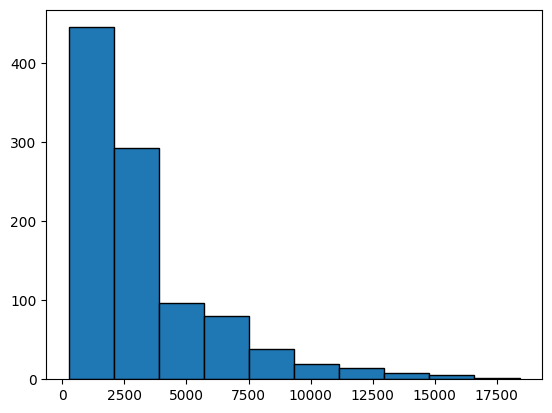

In [ ]:
plt.hist(df['Credit amount'],bins = 10, edgecolor='black')

In [ ]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,0,2,3,1,1,1169,6,radio/TV,1
1,22,1,2,3,1,2,5951,48,radio/TV,0
2,49,0,1,3,1,1,2096,12,education,1
3,45,0,2,1,1,1,7882,42,furniture/equipment,1
4,53,0,2,1,1,1,4870,24,car,0


In [ ]:
df['Housing'].unique()

array([3, 1, 2])

In [ ]:
df['Checking account'].unique()

array([1, 2, 4])

In [ ]:
df['Saving accounts'].unique()

array([1, 3, 4, 2])

In [ ]:
df['Purpose'].unique()

array(['radio/TV', 'education', 'furniture/equipment', 'car', 'business',
       'domestic appliances', 'repairs', 'vacation/others'], dtype=object)

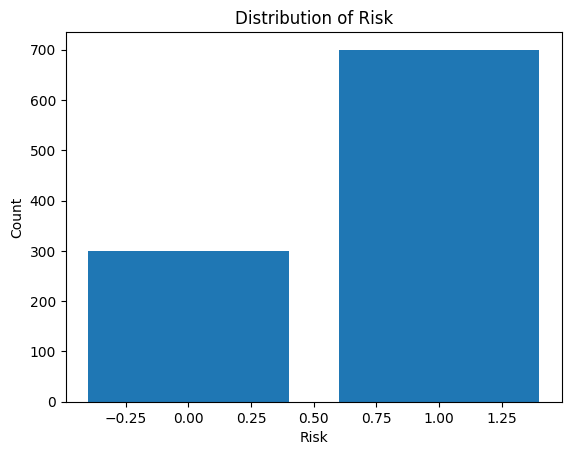

In [ ]:
# Assuming you have a pandas DataFrame called 'data' with a column named 'risk'
risk_counts = df['Risk'].value_counts()

# Plotting the bar graph
plt.bar(risk_counts.index, risk_counts.values)
plt.xlabel('Risk')
plt.ylabel('Count')
plt.title('Distribution of Risk')
plt.show()


In [ ]:
df['index'] = df.index

In [ ]:
df.iloc[99]

Age                   36
Sex                    0
Job                    3
Housing                2
Saving accounts        1
Checking account       2
Credit amount       7057
Duration              20
Purpose              car
Risk                   1
index                 99
Name: 99, dtype: object

Colaborative Filterieng

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Create a user-item matrix
user_item_matrix = pd.pivot_table(df, values='Risk', index='index', columns='Purpose', fill_value=0)

# Calculate similarity matrix using cosine similarity
similarity_matrix = pd.DataFrame(cosine_similarity(user_item_matrix))

# Function to recommend loan purposes for a new user
def recommend_loan_purpose(user_id, top_n=5):
    user_index = user_id - 1  # Adjust for zero-based indexing

    # Get the similarity scores for the user
    user_similarities = similarity_matrix.iloc[user_index]

    # Sort the similarities in descending order
    sorted_similarities = user_similarities.sort_values(ascending=False)

    # Get the top N most similar users
    top_users = sorted_similarities.iloc[1:(top_n + 1)]  # Exclude the user itself

    # Get the loan purposes preferred by the top users
    recommended_purposes = user_item_matrix.iloc[top_users.index].sum().sort_values(ascending=False).index[:top_n]

    return recommended_purposes

# Example usage
new_user_id = 156  # Replace with the ID of the new user
top_n_recommendations = 3  # Number of loan purpose recommendations to provide

recommendations = recommend_loan_purpose(new_user_id, top_n=top_n_recommendations)
print("Recommended loan purposes for user", new_user_id, ":")
for i, purpose in enumerate(recommendations):
    print(i+1, "-", purpose)


This is user purpose:  Purpose
business               0
car                    0
domestic appliances    0
education              0
furniture/equipment    0
radio/TV               0
repairs                1
vacation/others        0
Name: 156, dtype: int64
After user matrix

User wants loan for:  repairs
User has the risk of:  1
Recommended loan purposes for user 156 :
1 - business
2 - furniture/equipment
3 - car


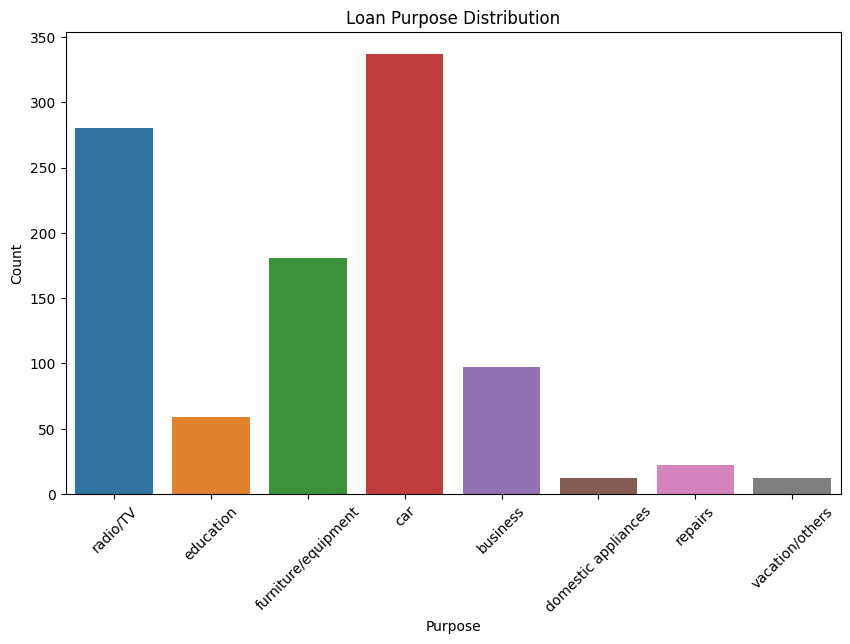

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# df = pd.read_csv('loan_data.csv')  # Replace 'loan_data.csv' with your dataset filename

# Plot the graph of purpose counts
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Purpose')
plt.title('Loan Purpose Distribution')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

balancing the data in purpose column will not help.

Tried Content Based Filtering

In [ ]:
# import pandas as pd
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.metrics.pairwise import cosine_similarity

# # Load the dataset

# # Select relevant columns for content-based filtering
# df_content = df[['Purpose']]

# # Preprocess the text data
# df_content['Purpose'] = df_content['Purpose'].str.lower()

# # Initialize the TF-IDF vectorizer
# vectorizer = TfidfVectorizer()

# # Create TF-IDF matrix
# tfidf_matrix = vectorizer.fit_transform(df_content['Purpose'])

# # Compute cosine similarity matrix
# cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# # Function to recommend loan purposes based on content similarity
# def recommend_loan_purpose(content, top_n=5):
#     # Preprocess the input content
#     content = content.lower()

#     # Get the index of the input content in the dataframe
#     content_index = df_content[df_content['Purpose'] == content].index[0]

#     # Get the cosine similarity scores for the input content
#     content_similarities = cosine_sim[content_index]

#     # Sort the similarities in descending order
#     sorted_similarities = content_similarities.argsort()[::-1]

#     # Get the top N most similar loan purposes
#     top_purposes = df_content.iloc[sorted_similarities[1:(top_n + 1)]]['Purpose']

#     return top_purposes

# # Example usage
# new_content = 'car'  # Replace with the loan purpose for which you want recommendations
# top_n_recommendations = 5  # Number of loan purpose recommendations to provide

# recommendations = recommend_loan_purpose(new_content, top_n=top_n_recommendations)
# print("Recommended loan purposes for content:", new_content)
# for i, purpose in enumerate(recommendations):
#     print(i+1, "-", purpose)


Recommended loan purposes for content: car
1 - car
2 - car
3 - car
4 - car
5 - car


<ipython-input-81-62eab8aedaa8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_content['Purpose'] = df_content['Purpose'].str.lower()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a scatter plot with color encoding for the 'Risk' feature
sns.scatterplot(data=df, x='credit_amount', y='duration', hue='risk')

# Set the labels and title
plt.xlabel('Credit Amount')
plt.ylabel('Duration')
plt.title('Relationship between Credit Amount, Duration, and Risk')

# Show the plot
plt.show()
